<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Deep-CNN-Architecture-Implementation/blob/main/Complex_ResNet_Architecture_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'

In [ ]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preparatin using ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
WIDTH=224
HEIGHT=224

In [ ]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #horizontal_flip=True,
                                    #shear_range=0.1 ,
                                    #zoom_range=0.1,
                                    #rotation_range=20,
                                    #height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [ ]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [ ]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [ ]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [ ]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

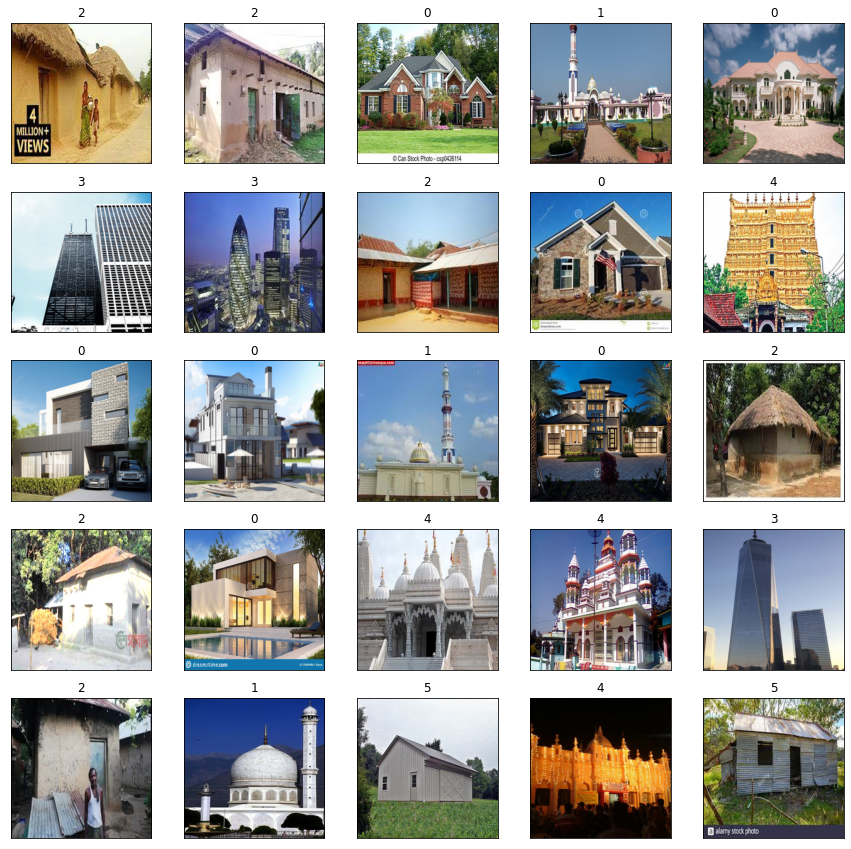

In [ ]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

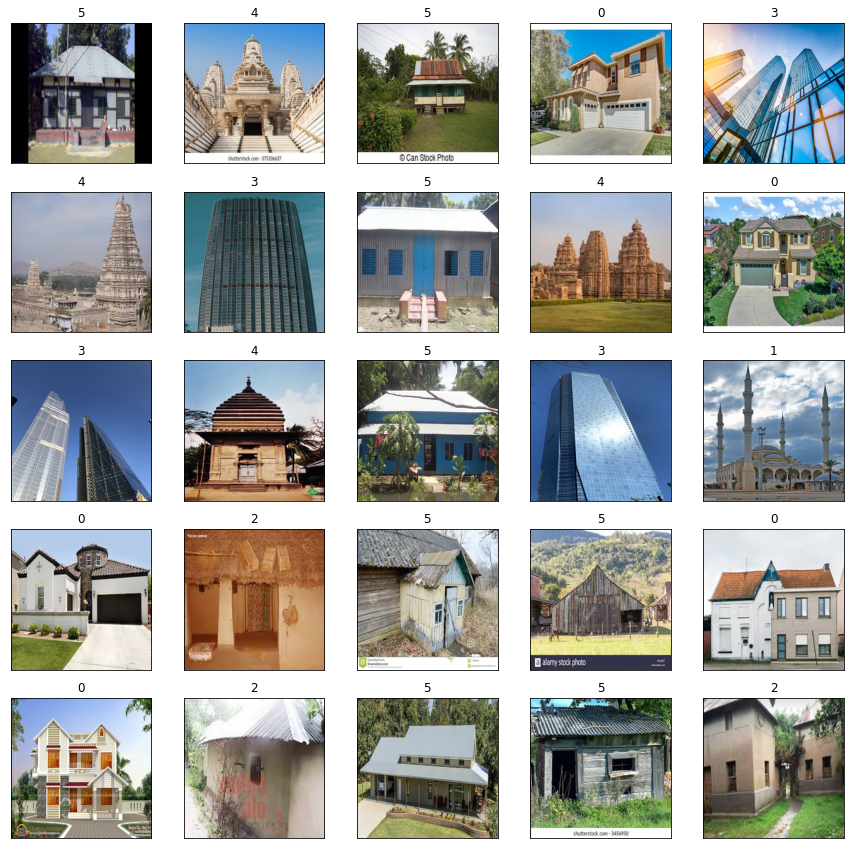

In [ ]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Library

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import add
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

## Create ResNet Block

In [ ]:
def residual_block(layer_input,n_filters):
  
  #conv1
  conv1=Conv2D(n_filters,(3,3),padding='same',activation='relu')(layer_input)
  #conv2
  conv2=Conv2D(n_filters,(3,3),padding='same',activation='linear')(conv1)

  #add filters
  layer_out=add([conv2,merge_input])
  # add activation function
  layer_out=Activation('relu')(layer_out)
  return layer_out


## Define Simple Inception Model

In [ ]:
"""
input_shape=(224,224,224)
model_input=Input(shape=(input_shape))
"""


'\ninput_shape=(224,224,224)\nmodel_input=Input(shape=(input_shape))\n'

In [ ]:
"""
layer=inception_block(model_input,64,128,32)
layer
"""


'\nlayer=inception_block(model_input,64,128,32)\nlayer\n'

In [ ]:
"""
model=Model(inputs=model_input,outputs=layer)
model.summary()
"""

'\nmodel=Model(inputs=model_input,outputs=layer)\nmodel.summary()\n'

In [ ]:
#plot_model(model,show_shapes=True,to_file='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/inception.png')

## Define Complex ResNet Function

In [ ]:
def residual_module(layer_input,n_filters):
  merge_input=layer_input
  # check if the number of filters 
  if layer_input.shape[-1] != n_filters:
    merge_input= Conv2D(n_filters,(1,1),padding='same',activation='relu')(layer_input)
  
  #conv1
  conv1=Conv2D(n_filters,(3,3),padding='same',activation='relu')(layer_input)
  #conv2
  conv2=Conv2D(n_filters,(3,3),padding='same',activation='linear')(conv1)

  #add filters
  layer_out=add([conv2,merge_input])
  # add activation function
  layer_out=Activation('relu')(layer_out)
  return layer_out


## Inplement Inception

In [ ]:
total_class=6

In [ ]:
model_input=Input(shape=(224,224,3))
model_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
layer=residual_module(model_input,32)
layer=residual_module(layer,64)

In [ ]:
layer=Flatten()(layer)

In [ ]:
layer=Dropout(0.2)(layer)
layer=Dense(128,activation='relu')(layer)
layer=Dense(total_class,activation='relu')(layer)

In [ ]:
model=Model(inputs=model_input,outputs=layer)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 32) 128         input_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
import time
print(time.time())

1620453433.0450416


In [ ]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/ResNet'+str(int(t))+'.png'
image_name

'/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/ResNet1620453433.png'

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/ResNet1620453433.png


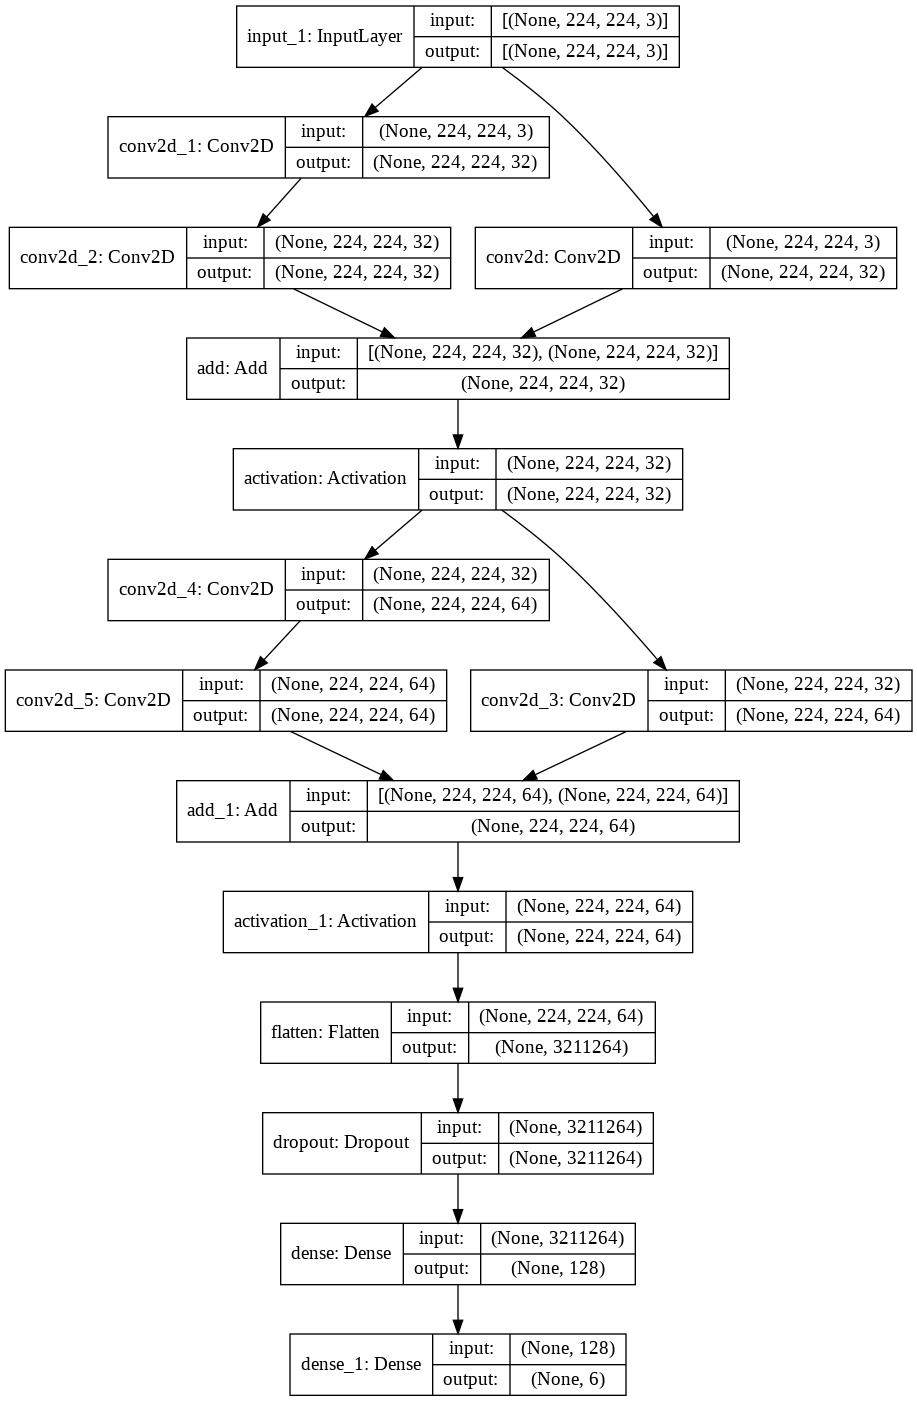

In [ ]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/ResNet'+str(int(t))+'.png'
print(image_name)
plot_model(model,show_shapes=True,to_file=image_name)

In [ ]:
## Compile The Model 

In [ ]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the Model

In [ ]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/200
30/30 [==============================] - 12s 405ms/step - loss: 3.6305 - accuracy: 0.4927 - val_loss: 4.0761 - val_accuracy: 0.4777
Epoch 2/200
30/30 [==============================] - 12s 403ms/step - loss: 4.0421 - accuracy: 0.4740 - val_loss: 3.8764 - val_accuracy: 0.4062
Epoch 3/200
30/30 [==============================] - 12s 405ms/step - loss: 3.7069 - accuracy: 0.4313 - val_loss: 4.3879 - val_accuracy: 0.3036
Epoch 4/200
30/30 [==============================] - 12s 407ms/step - loss: 3.8096 - accuracy: 0.4156 - val_loss: 3.8724 - val_accuracy: 0.3705
Epoch 5/200
30/30 [==============================] - 12s 410ms/step - loss: 3.6121 - accuracy: 0.4708 - val_loss: 3.5817 - val_accuracy: 0.4598
Epoch 6/200
30/30 [==============================] - 12s 408ms/step - loss: 3.8771 - accuracy: 0.3875 - val_loss: 3.8044 - val_accuracy: 0.3705
Epoch 7/200
30/30 [==============================] - 12s 410ms/step - loss: 3.6593 - accuracy: 0.4760 - val_loss: 3.9849 - val_accuracy:

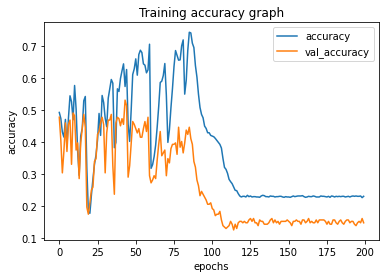

In [ ]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

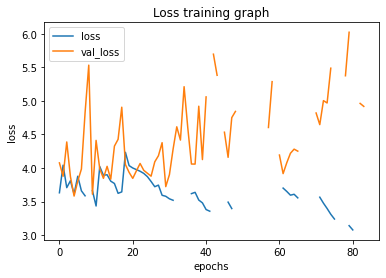

In [ ]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [ ]:
test_loss,test_accuracy=model.evaluate(test_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)


10/10 [==============================] - 96s 11s/step - loss: nan - accuracy: 0.1500
Test Loss:  nan
Test Accuracy:  0.15000000596046448


## Saved Model

In [ ]:
import time
t = time.time()

export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/ResNet{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/ResNet0.15000000596046448_model_1620457320.h5


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 32) 128         input_1[0][0]                    
______________________________________________________________________________________________